In [1]:
%matplotlib inline
# from pylab import *
# from math import ceil
# from PIL import Image

In [51]:
from ipywidgets import interact, interactive, fixed, widgets
from ipywidgets.widgets import IntSlider
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow
from IPython.display import clear_output, display, HTML
from PIL import Image
from matplotlib import cm

In [190]:
class Pic():
    
    def __init__(self, data, width=None, height=None, start=None, show_plot=True):
        self.width = width if width else int(sqrt(len(data))) #TODO: 2D arrays
        self.height = height if height else int(ceil(len(data) / self.width))
        self.start = start if start else 0
        self.data = data
        self.show_plot = show_plot
        
    def set_width(self, width):
        self.width = width
        self.height = int(ceil(len(self.data) / width))
        #you could clip the data...  self.data = self.data[:width*self.height]
        
    def show(self):
        im = Image.new('L', (self.width, self.height))
        im.putdata(self.data[self.start:])
        if self.show_plot:
            imshow(im ) # cmap=cm.Greys_r, interpolation='nearest'
        return im
        
    def __repr__(self):
        self.show()  #this actually get the graph out there
        return str((self.width, self.height))
    
    def update(self, sequence='', width=None, start=None): # for use with interact(update, ...)
        if sequence: self.data = sequence
        if width: self.set_width(width)
        if start or start == 0: self.start = start  
        if self.show_plot:
            self.show() #display to screen
        
    def gui(self):
        length = len(self.data)
        return interactive(self.update, 
                           sequence=self.data, 
                           width=IntSlider(min=1, max=length//2, value=self.width), 
                           start=IntSlider(min=0, max=length,    value=self.start))

In [191]:
from collections import defaultdict
from math import sqrt, ceil

class NucleotideDisplay(Pic):
    color_map = defaultdict(lambda: (255, 255, 255), A=(255, 0, 0), G=(0,255,0), C=(0, 0, 255), T=(250, 240, 114)) #color RGB
    def __init__(self, data, show_plot=True):
        width = int(sqrt(len(data)))
        super().__init__(data, width=width, show_plot=show_plot)
        
    def show(self):
        im = Image.new('RGB', (self.width, self.height), "white")
        im.putdata(self.nucleotide_to_color(self.data[self.start:]))
        if self.show_plot:
            imshow(im, interpolation='nearest')
        return im
        
    def nucleotide_to_color(self, sequence):
        #Pad with extra gray pixels?
        return [self.color_map[nucleotide] for nucleotide in sequence]

In [192]:
nd = NucleotideDisplay(human_sample)

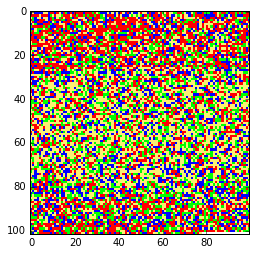

In [193]:
nd.gui()

In [194]:
"""From tonysyu.github.io"""
def imshow_pair(image_pair, titles=('', ''), figsize=(20, 5), **kwargs):
    from IPython.display import clear_output
#     clear_output(True)
    fig, axes = plt.subplots(ncols=len(image_pair), figsize=figsize)
    for ax, img, label in zip(axes.ravel(), image_pair, titles):
        ax.imshow(img, interpolation='nearest', **kwargs)
        ax.set_title(label)
        
#     plt.close(fig)
        
# def interactive_convolution_demo(image, kernel, **kwargs):
#     stepper = make_convolution_step_function(image, kernel, **kwargs)
#     start_slider = IntSliderWidget(min=0, max=100, value=0)
#     widgets.interact(stepper, i_step=start_slider)

In [195]:
def print_only_unique(chimp, human):
    from array import array
    ref_array = array('u', human)
    que_array = array('u', chimp)
    shortest_sequence = min(len(chimp), len(human))
    for i in range(shortest_sequence):
        # only overlapping section
        if human[i] == chimp[i]:
            ref_array[i] = 'X'
            que_array[i] = 'X'
    return ''.join(que_array), ''.join(ref_array)

In [200]:
class AlignmentDisplay():
    def __init__(self, A, B):
        self.start = 0
        self.A = A
        self.B = B
        self.chimp = NucleotideDisplay(A, show_plot=False)
        self.human = NucleotideDisplay(B, show_plot=False)
        
    def update(self, start=None):
        c_start = max(0, -start)
        h_start = max(0, start)
        self.human.update(start=h_start)
        self.chimp.update(start=c_start)
        c1 = self.chimp.show()
        h1 = self.human.show()
        chimp_unique, human_unique = print_only_unique(self.A[c_start:], self.B[h_start:])
        chimp_unique = NucleotideDisplay(chimp_unique, show_plot=False).show()
        human_unique = NucleotideDisplay(human_unique, show_plot=False).show()
        imshow_pair((c1, chimp_unique, human_unique, h1), ('Chimp', 'Chimp Unique', 'Human Unique', 'Human'))
#         human_unique = NucleotideDisplay()
        
    def gui(self):
        length = len(human_sample)
        return interactive(self.update, 
                           start=IntSlider(min=-400, max=400,    value=self.start))

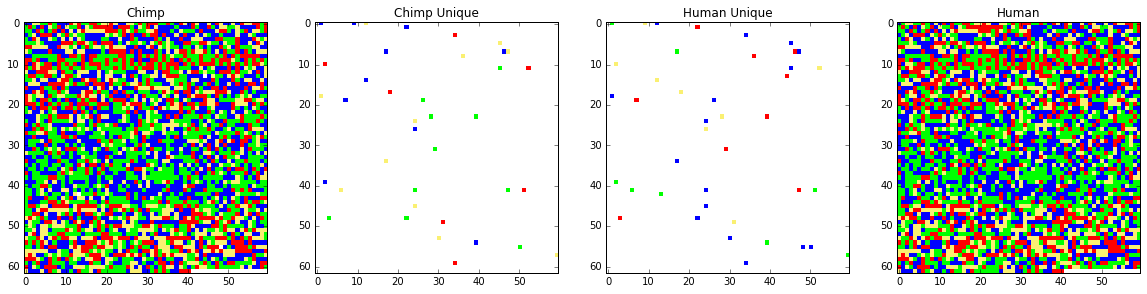

In [201]:
align = AlignmentDisplay(aligned_chimp, aligned_human)
# for i in range(-5, 5):
#     align.update(i)
align.gui()

75 0.6810768323835724
157 0.6803890744743565
158 0.5755551188838671
159 0.5505993318923168
160 0.6023776773432894
161 0.6829436038514443
163 0.5649439968559639
169 0.6846138730595401
186 0.686382393397524
194 0.6826488504617804
197 0.6857928866181962
199 0.6857928866181962


(400, 20)

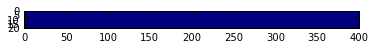

In [118]:
def count_differences(A, B):
    count = 0
    for i in range(min(len(A), len(B))):
        if A[i].upper() != B[i].upper():
            count += 1
    return count

start = 200
scores = []
for offset in range(-start, start):
    score = count_differences(human_sample[start + offset:], chimp_sample[start:])
    if score < 7000:
        print(offset, score/len(human_sample))
    scores.append(score/len(human_sample))
Pic(scores, width=len(scores), height=20)


(10, 10)

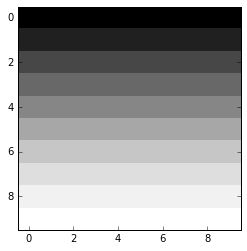

In [92]:
Pic([x/10 for x in range(100)])

In [108]:
cm.Greys_r(.9)

(0.95386390125050269, 0.95386390125050269, 0.95386390125050269, 1.0)

In [8]:
[widget for widget in dir(widgets)]

['Accordion',
 'BoundedFloatText',
 'BoundedIntText',
 'Box',
 'Button',
 'CallbackDispatcher',
 'Checkbox',
 'Color',
 'ColorPicker',
 'Controller',
 'DOMWidget',
 'Dropdown',
 'EventfulDict',
 'EventfulList',
 'FlexBox',
 'FloatProgress',
 'FloatRangeSlider',
 'FloatSlider',
 'FloatText',
 'HBox',
 'HTML',
 'Image',
 'IntProgress',
 'IntRangeSlider',
 'IntSlider',
 'IntText',
 'Label',
 'Latex',
 'Layout',
 'Output',
 'PlaceProxy',
 'Proxy',
 'RadioButtons',
 'Select',
 'SelectMultiple',
 'SelectionSlider',
 'Tab',
 'Text',
 'Textarea',
 'ToggleButton',
 'ToggleButtons',
 'VBox',
 'Valid',
 'Widget',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 'domwidget',
 'eventful',
 'fixed',
 'handle_version_comm_opened',
 'interact',
 'interact_manual',
 'interaction',
 'interactive',
 'jsdlink',
 'jslink',
 'register',
 'trait_types',
 'widget',
 'widget_bool',
 'widget_box',
 'widget_button',
 'widget_color',
 

In [6]:
human_sample = """ATATAGTAGGTTTTGAAGGAACATACTTCAATAATAAGAGCCATCTACCTATGACAAACTCACAGCCAACATCATACTGAATGGGCAAAAGCTGAAAACA
CTCCCCTTCAACATCAGCACAAAACAAAGATGCCCTCTCTCATCACTCCTATTCACCATAGTATTGGAAGTCCTGACCAGGGCAATGAAGCAAGAGAGAA
AAAATAAACGTATTGAAATAAGAAGAGAAGAAGTCAAACTATCCCTGTGTGCAGACAACATGATCCTGTATTCAGAAAACCCCCATAGCCTCAGCCCAAA
TGCTTCTTCAGCTGATAAGCAATTTCAGCAAAGGCTCAGAATAGAAAATCAATGTGCAAAATCACTTATATTTTTATACACCAACAACAGTTAATTTGAG
AGCCAAATCAGAAAGGCAATTTCATTCACAATTGCCACAAAAAATAAAATACCTAGAAATACAGCTATCCAGGGAGCTGAAAGATCTCTACAAGGAGAAC
TACAAACCACTGCTCAAAGAAATCAGAGATAACACAAATAAATGAAAATAAAATTCCATGATCACGGAGAGGAAGAATCAATATTGTTAAAATGGCCATA
CTGCCCAAAGCAATTTACAGACTCAATGCTATTCCTATTAAACTAACATTGACATTCCTCACAGAACTAGAAAAAACTATTTTAAAAATCATATGGACCT
GAAAAAGAGCCCAAATAGCCAGGGTAATCCTAAGCAAAAGAAAAAAGCTGAAAACATCATGCTTCCCAACTTAAAACTATATGACATGACTGCACTCTAG
CCTGGGTGACATAGCGAGACTCTGTCTAAAAAAAAAGAAAAAAAGAAAAAAAGAAAAAAACTATATGACATGGCTACAGTAATCAAAACAGCATGGTACT
GATGCAAAAACAGACACATAGACAAATGGAAAAAATAGAATACCCAGAAATAAGGTCACACACCTACAAGTACTCGATCTTCAACAATCCTGACAAAAAC
AAGGAATAGGAAAAGAAACCCCTATTCAATAAATGGTGCTGGGGTAACTGGCTAGCTATATGCAGAAGATTAAATTTGGAGCCCTTCCTTACACCATACA
CAAAAATTAACTCAAGATGGATAAAAACTTAAATGTAAAACCCCAAACTATAAAAACCCTGGAAGGTAACCTAAGCAGTGCCATTCTGGACATTGGAACA
AACAAGGATTTCATGATGAAGACACCAAAAGCCATTGCAACAAAGGCAAAAATTCACAAATGAGATTTAATTAAACTAAAGAGCTTCTGTGCAGCAAAGG
AAACTATCAACAGAGTAAACAGACAACTTACAGAATGGAAGAAAATTTTTGCAAACTATGCATCTGACAAAGGTCTAATATCCAGTATCTATCAGGAACT
TAAATTTATAAAGAAAAGAGCCAAACAATTCCATTAAAATAGGCAAAAATCATGAAGAGACACTTTTCAAAAGAAGACATACATGTGGCCAATGATCATA
TGGAAAAAATCTCAACATCACTGATTATTAGAGAAATGCAAATGAAAACTACAATGAGATACCGTCTTATACCAGTCAGAATGGCTATTATTAAAAAGTC
AAAAAATTAAAGATGCTGCAGAGGTTGCAGAGAAAAGAATGCTTATACACTGTTGGTGGGAGTGTAAATTATTTCAACCACTGTGGAAAACAGTGTGGTG
ATTCCTCAAAGACCTAAAGACAAAAATACCACTTGATCCAGCAATCCTATTACTGGGTATATACCCAAAGTTATATAAATCATTCTATTATAAAGATACA
TGCATACATATGTTCTTTCCAGTACTATTCAAAATAGCAAAGACATGAAAGGAATGTAAACACCCATCAATGGTAGACTGGATAAAGAAAATATGGTACA
TATACACAATGGAATACTATGCAGTCATAGAAAAGAATGAGGTTATGTTCTTTGCAGGAACATGGATAGAGCTGGAGGCCATTATCCTTAGCAAACGAAT
GCAGGGTCAGAAAACCAAATACCACATGTTTTCACTGATAAGTGGGGGCTAAATGATAAGAACACATGGACACATAGAGGGAAACAACACACACTGGGTC
TATTGCAGGGTGGAGGGTGGGACAAGGGAGTGGGTCAGCAAAAATAACTAATCGGTACTAGGCTTAATAGCTGGGTGATGAAACAATCTATACAACAAAC
CACCATGACACAAGTTTACCTACATAAGAAACCTGTGCATGTACACCTGAACTTAAAATATAAGTTAAAAAGTGAATTATTGGACAGGGCGTGGTGGCTC
ACGCTTGTAGTTCCATCACTTTGGGAGGCCAAGGCAGGCAGATCACAAGGTCAGGAGTTCGAGACAAGCCTGACCAACATGGTGAAACCCCATCTCTACT
AAAAATACAAAAATTAGCCAGGCATGGTGGTGCATGCCTGTAATCCCAGCTTCTCAAGAGGCAAGCCTCATGGTAATTACAAAGAAAAACCTACAATAGA
CACAAAAAAGAAAAAAAGAAAAGAGTCAAAGTGTATCACTACAAAAATAATAAAATCACAAATACAGATAGCAAGAGAGGAAGACAGAAACAGAAGAACT
ACAAAACGGACAGAAAATAATTAGTAAAATGGCAATAAGAAGTTCTTACTTTTTTCATTATACTTTAAGTTTTAGGGTACATGTGCACAACGTGCAGGTT
AGTTACATATGTATACATGTGCCATGTTGGTGTGCTGCACCCATTAACTCGTCAATTAACATTAGATATATCTCCTAATGCTTTCCCTCCCCTCTCCCCA
CACCCCACAACAGGCCCCGGTGTGTGATGTTCCCCTTCCTGTGTCCATGTGTTCTCATTGTTCAATTCCCACCTGTGAGTGAGAATATGCGGTGTTTGGT
TTTTTGTCCTTGCGATAGTTTGCTGAGAATTATGGTTTCCAGCTTCATCCATGTCCCTACAAAGCACATAAACTCATCCTTTTTTATGGCTGCATATATT
CCATGGTATATATGTGCCACATTTTCTTAATCCAGTCTATCATTGTTGGATATTTGGGTTGGTTCCAAGTCTTTGCCATTGTGAATAGTGCCGCAATAAA
CATACATGTGCATGTGTCTTTATATCAGCATGATTTATAATCCTCAGGGAATATACCCAGTAATGGGATGGCTGGGTCAAATGGTAATTCTAGTTCTAGA
TCCCTGAGGAATCGCCACACTGAGTTCCACGATGGTTGAACTAGTTTACAGTCCCACCAACAGTGTAAAAGTGTTCCTATTTCTCCACATCCTCTCCAGC
ACCTGTTGTTTCCTGACTTTTTAATGATCGCCATTCTAACTGGTGTGAGATGGTATCTCATTGTGGTGTTGATTTGCATTTCTCTGATGACCAGTAATGA
TGAGCATTTTTTCATGTTTTTTGGCTGCATAAATGTCTTCTTTGGAGAAGCATCTGTTCATATCCTTCGCCCACTTTTTGATGTGGTTGTTTGTTTTTTT
GTTGTACATTTGTTTGAGTTCTTTGTAGATTCTGGATATTAGCTCTTTGTCAGATGGGTGGATTGCAAAAATTTTCTCCCATTCTGTAGGTTGCCTGTTC
ACTCTGATGGTAGTTTCTTTTGCTGTGCAGAAGCTCTTTAGTCCAATTAGATCCCATTTGTCAATTTTGTCTTTTGTTGCCATTGCTTTTGGTGTTTTAG
ACATGAAGTCCTTGCCCATGCCTATGTCCTGAATTGTATTGCCTATGTTTTCTTCTAGGGTTTTTATGGTTTTAGGTTTAACATTGAAGTCTTTAATCCA
TCTTGAATTAACTTTAGTATAAGGTGTAAGAAAGGGATCCAGTTTCAGCTTTCTCCATGTGGCTAGCCAGTTTTCCCAAGCACCATTTATTAAATAGGGA
ATCCTTTCCCCATTTCTTGTTTTTGTCAGGTTTGTCAAAGATCAGATAGTTGTAGATATGCGGCATTATTTCTGAGGGCTTTGTTCTGTTCCATTGGTCT
ATATCTCTGTTTTGGTACAAGTACCATGCTGTTTTGGTTACTGTAGTCTTATAGTATAGTTTGAAATCAGGTAGCGTGATGCCTCCAGCTTTGTTCTTTT
GGCTTAGGATGGACTTGGCAATGTGGGCTCTTTTTTAGTTCCATATGAACTTTAAAGTAGTTTTTTCCGATTCTGTAAAGAAAGTCATTGGTAGCTTGAT
GGGGATGGCTTTGAATCTATAAATTACCTTGGGCAGTATGGCCATTTTCATGATATAGGTTCTTCCTACTCATGAGCATGGAATGTTCTTCCATTCGTTT
GTATCCTCTTTTATTTCATTGAGCAATGGTTTGTAGTTCTCCTTGAAGAGGTCCTTCACATCCCTTGTAAGTTGGATTTCTAGGTATTTTATTCTCTTTG
GAGCAATTGTGAATGGAAGTTCACTCATGATTTGGCTCTCTGTTTGTCTCTTATTGGTGTATAAGAACGCTTGTGATTTTTGCATGTTGATTTTGTATCT
TGAGACTTTGCTGAAGTTGCCTATCAGCTTAAGGAGATTTTGGGCTGAGAAGATGGGGTTTTGTAGATATACAATCATGTCAGCTGCAAATAGGGACAAT
TTGACTTCCTCTTTTCCTAATTGAATACCGTTTATTTCCTTCTCCTGACTGATTGCCCTGGCCAGAACTTCCAATACTATGTTGAATAGGAGTGGTGAGA
GAGGGCATCTGTGTCTTGTGCCAGTTTTCAAAGGGAATGCTTCCAGTTTTTGCCCATTCAGTATGACATTGGCTGTGGGTTTGTCATAGATAGCTATTAT
TATTTTAAGACATGTCCCATCAATACCTAATTTATTGGGAGATTTTAGCATGAAGCACTGTTGAATTTTGTCAAAGGCCTTTTCTGCATCTATTGAGATA
ATCATGTGGTTTTTGTCTTTCGTTCTGTTTATATGCTGGATTACATTTATTGATTTGTGTATGTTGAACCAGCCTTGCATCCCAGGGATGAAGCCCGATT
GATCACGGTGGATAAGCTTTTTGATGTGCTGCTGGATTCGGTTTGCCAGTATTTTATTGAGGATTTTTGCATTGATGTTCATCAGGGATATTGGTCTAAA
ATTCTCTTTTTTTTGTTGTGTCTCTGCCAGGCTTTGGTATCAGAATGTTGCTGGCCTCATAAAATGAGTTAGGGAGGATTACCTCTTTTTCCATTTATTG
GAATAGTTTCAGAAGGAATGGTACCAGCTCCTCCTTGTACCTCTGGTAGAATTCTGCTGTGAATCCATCTGGTCCTGGACTTTTTTTGGTTGGTAAGCTA
TTAATTATTGCCTCACTTTCAGAGCCTGTTATTGGTCTATTCAGAGATTCAACTTCTTCCTGGTTTAGTCTTGGGATGGTGTATGTGTCAAGGAATTTAT
TCATTTCTTCTAGATTTTCTAGTTTATTTGCATAGAGGTGTTTATAGTATTCTCTGATGGTAGTTTGTATTTCTGTGGGATCGGTGGTGATATCCCCTTT
ATCATTTTTTATTGCGTCTATTTGATTCTTCTCTGTTTTCTTCTTTATTAGTCTTGCTGGTGGTCTATCAATTTTGTTGATCTTTTCAAAAAACCAGCTC
CTAGATTCATTGATTTTTTGAAGGGTTTTTTGTGTCTCTATTTCCTTCAGTTCTGCTCTGATCTTAGTTATTTCTTGCCTTCTGCTAGCTTTTGAATGTG
TTTGCTCTTGCTTCTCTAGTTCTTTTAATTATGATATTATGGTGTCAATTTTAGTTATTTCCTGCTTTCTCTTGTGGGCATTTAGTGCTATAAATTTCCC
TCTACACACTGCTTTGAATGTGTCCCAGAGATTCCGGTATATTGTGTCTCTGTTCTCGTTGGTTTCAAAGAACATCTTTATTTCTGCCTTCATTTCATTA
TGTATCCAGTAGTCATTCAGGAGCAGGTTTTTCAGTTTCCATGTAGTTGAGTGGTTTTGAGTGATTTTCTTAATCCTGAGTTCTAGTTTGATTGCACTGT
GGTCTGAGAGAGAGTTTGTTATAATTTCTGTTGTTTTACATTTGCTGAGGAGTGCTTTACTTCTAACTATGTGGTCAATTTTGGAATAGGTGTGGTGTGG
TGCTGAAAAGAATGTATATTCTGTTGATTTGGGGTGGAGAGTTCTGTAGATGTCTATTAGGTCCACTTGGGTGCAGAGATGAGTTCAATTCCTGCATATC
ATTGTTAACTTTCTGTCTCGTTGATCTGTCTAATGTTGACAGTGGTGTCAAAGTCTCCCATTATTATTGTGTGCAAGTCTAAGTCTCTTTCTAGGTCTCT
AAGGACTTGCTTTATGAATCTGGGTGCTCCTGTATTGGGTGCATATATATTTAGGATAGTTAGCTCTTCTTGTTGAATTGATCCCTTTACCATTATGTAA
TGGCCTTCTTTGTCTCTTTTGATCTTCATTGGTTTGAAGTCTTTTTTATCAGAGACTAGGATTGCAACCCCTGCCTTTTTTTGTTTCCCATTTACTTGGT
AGATCTTCCTCCATCCCTTTATTTTGAGCCTATGTGTGTCTCTGCACATGAGATGGGTTTCCTGAATACAGCACACTGATGGGTCTTGACTCTTTATCCA
ATTTGTCAGTCTGTGTCTTTTAATTGGAGCATTTAGCCCATTTACATTTAAGGTTAATATTGTTCTGTGTGAATGTGATCCTGTTGTTATGATGTTAGCT
GGTTATTTTGCTCATTAGTTGATGCAATTTCTTCCTAGCCTCAATGGTCTTTACAATTTGGCATGTTTTTGCAGTGGCTGGTACCAGTTGTTCCTTTCTA
TGTTTAGTGCTTCCTTCAGGAGCTCTGTTAGGGCAGGCCTGATGGTGACAAAATCTGTCAGCATTTGCTTGTCTGTAAAGGATTTTATTTCTCCTTCACT
TATGAATGTTAGTTTGGCTGGATATGAAATTCTGGGTTGAAAATTCTTTTCTTTAAGAATGATGAATATTGGCCCCCACTCTCTTCTGGCTTGTAGAGTT
TCTGCCGAGAGATCCACTGTTATTCTGATGGGCTTCCCTTTGTGCATAACCCGACCTTTCTCTCTAGCTGCCCTTAACATTTTTTTCCTTCATTTCAACT
TTGGTGAATCTGACAATTATATCTTGGAGTTGCTCTTCTCAAGGAGCATCTTTTTGGCATTCTCTGTGTTTCCTGAATTTGAATATTGGCCTGCCTTGTT
AGATTGGGGAAGTTCTCCTGGATAATGTCCTGCAGAGTGTTTTCCAACTTGGTCCCATTCTCCCCGTCACTTTCAGGTACACCAATCAGAAGTAGATTTG
GTCTTTTCACATAGTCCCATATTTCTTGGTGGCTTTGTTCATTTCTTTTTGTTCTTTTTTCTCTAAACTTCTCTTCTCACTTCATTTCATTCATTTGATC
TTCCATCACTGATACTCTTTCTTCCAGTTGATCGAATCAGCTACTGAGGCTTGTGGATTTGTCACACAGTTCTCATGCCATGGTTTTCAGCTCCATCAGG
TCCTTTAAGGACTTCTCTGCATTTGTTATTCTAGTTAGCCATTCATCTAATTTTTTGAAGGTTTTTAACTTCTTTGCCATGGGTTCGAACTTGCTCCTTT
AGCTTGGAGTAGTTTGATCATCTGAAGCCTTCTTCTCTCAACTCATCAAAGTCGTTCTCCTTCCAGGTTTGTTCTGTTGCTGGTGAGAAGCTGTGTTCCT
TTGGAGGAGGAGAGGCACTCTGATTTTTAGAGCTTCCCGTTTTTCTGCTCTGTTTTTTCCCCATCTTTGTGGTTTTATCTACCTTTGGTCTTTGATGATG
GTGACATACCGACAGGGTTTTGGTATGGATGTCCTTTCTGTTTGTTAGTCTTTGAGGTCCACTCCAGACCCTGTTTACCTGGGTATCCGCAGCAGAGGCT
GCATAACAGCAGATATTGGTGAACAGCAAATGTTGCTGCTTGATTTTTCCTCTGGAAGTTTTGTCTCAGAGGAGTACCCGGCTGTGTGAAGTGTCAGTCT
GCCACTACTGGGGGGTGCCTCCCAGTTAGGCTACTCTGGGGTCATTGACCCACGTGAGGAGACTGTCTGTCCATTCTCAGATCTCAAGCTGCATGCTGGG
AGAACCACTACTCTCTTCAAAGCTGTCAGACAGGGACCTTTAAGTCTGCAGAGGTTTCTGCTGCCTTTTGTTTGGCTATGCCCTGCCCCCAGAGGTGGAG
TCTACAGAGGCACGCAGGCCTCCTTGAGCTGTGGTGGGCTCCACCCAGTTTGAGCTTCCTGGCTGCTTTGTTTACCTACTCAAGCCTCAGTAATGGCGGG
CGCCCCTCCTCCAGCCTTGCTGCCTCCTTGCAGTTTGATCTCAGACTGCTGTTCTAGCAATGAGTGAGGCTCTGTGGGCATAGGACCCTCCAAGCCATGC
GTGGGATATAATCTCCTGGTGTGCTGTTTGCTAAGACCATTGGAAAAACACAGTATTGTGGGGGGAGTGACCCAATTTTCCAGTTGCTGTCTGTCACCCC
TTTCTTTGACTAGGAAAGGGAATTCCCTGACCCCTTGAGCTTCCCAGGTGAGGTGATGCCTCACCCTGCTTTGGCTCATGCTCGGTGCACTCCACCCACT
GTCCTGCACCCACTATCTGACACTCCCCAGTGAGATGAACCCAGTACCTCAGTTGGAAATGCAGAAATCACCCATATTCTGCCAGAAGTTCTTACATTGT
AATAATTACTTTATGTAAAAATGAATTACAGTTTATATAGAGTGAATAGATAGAAAACAAGATCAAGCTCTATGCTGTCTACCAGAGACTCATTTTTGAT
TTAAGTACACACTTAAGCTGAAAGTGAAAATGTAGAATAAAATATGATTGCAAATGGTATTTAAAAGGGAGCGGGGGGGCTCTATCTATATCAGACATAA
TAGACCTCAAGCCATAAACTCACAAGGGCCTAAGAAGGTCATCACATAATGAAAATAGGGTTAGTTCAGCAAGGTGATATAACAATTGTAAATATATATG
CATCCAATATCAAAATGTCTAGTTATATAAAGAAAAGATTGACATGTCCATAAGAAGAAATAGGCAATAAAATAAGTATAGAAGACTTTAATACCCCACT
ATCAACAATGGACATAGTAGGCAGTTTTTCCCTAACAGTGCTAGGTCTGGGAGGTGTGGACTGGGTAGAATTAATCACAGTGCGGTGAAGCAGCTGTGGC
CAGACTGCTTCTCTAGATTCCTCCTCACTGGGCAGGGAGTCTCTTTAAGAAAGGTAACAACCCCAGTCAGGGGCTTACAGATAAACTCCCATCTCCCTGG
GACAGAGCGCTTAAAAGAAGGGGAAGCTGTGGGCACAGTTTCAGAGGACTTAATCTCTCCTGCCTGCCAGCTCTGAAGAGAGCATCTAATCCTGGCAAGA
GGGATTCTCCCAGCACAGTGTACCAGCTTTGCTAAGGGACAGACTGCCTCCTCAAATGGGTTCCAGATACTCATGCCTTGTGACTAGGAAAGACTTCCCA
AAATGGGTCAACAGGCACCTCATACAGGAGAGCTTCAGCTGGCATCAGGCTCGTGTCCCTCTGGGATTAAGCTTCCAGAGGAAGGAGCAGACAGCAATCT
TTGCTGTTCTGAAGCCTCCACTGATGATACCCAGGCAAACTAGTTCTGGAGTGGACCTCCAGCAAACTATAGCGGACCTGCAGAAGATGGGCCTCTCTGT
CAGAAGAAAAACTAACAAACAGAAAGCAACAGCATCAACAACAACAATAAGAACCTCCACAAGAAACTCCATGCAAAGGTCTTTAGCCTCAAAGATCAAA
GGTAAATAAATCCACAAAGATAAAGAAAAACCAGTGCAAAAACACTGAAAATTCCAAACACCGGAATGGCTCTTCTCCAAATGATAACAACTCCTCTCTA
GCAAGGGTACAAAACTGGATGGAGAGTGAGAGTGACAAATTGACAGAAGTAGGCTTCAGAAGGTGGGTAATAACAAACTCCTCTGAGTCAAAGAGGCATG
TTCTAACCCAATGCAAGGAAGCTAAGAACAATGATAAAAGGTTACAGGCACAGATAACTAGAATAACCAGATTAGAGAAGAAAATAAATGACCTGATGGG
GCTGAAAAACACAGCAAGAGAAATTCATGAAGCAGACACAAGTATCAATAGCCAAATTGTTCAAGTGGAACAAACGAT""".replace('\n','')

In [7]:
chimp_sample = """CCAAATGCTTCTTCAGCTGATAAACAACTTCAGCAAAGGCTCAGAATAGAAAATCAATGTGCAAAATCATTTATATTTTTATACACCAACAACAGTTAAT
TTGAGAGCCAAATCAGAAAGGCAATTTCATTCACAATTGCCACAAAAAATAAAATACCTAGAAATACAGCTATCCAGGGAGCTGAAAGATCTCTACAAGG
AGAACTACAAACCACTGCTCAAAGAAATCAGAGATAACACAAATAAATGAAAATAAAATTCCATGCTCACGGAGAGGAAGAATCAATATTGTTAAAATGG
CCATACTGCCCAAAGCAATTTATAGACTCAATGCTATTCCTATTAAACCAACATTGACATTCCTCACAGAACTAGAAAAAACTATTTTAAAAATCATATG
GACCTGAAAAAGAGCCCAAATAGCCAGGGTAATCCTGAGCAAAAGAAAAAAGCTGAAAACATCATGCTTCCCAACTTAAAACTATATGACATGACTGCAC
TCTAGCCTGGGTGACATAGCGAGACTCTGTCTAAAAAAAAAATAAAAAAGAAAAAAAGAAAAAAACTATATGACATGGCTACAGTAATCAAAACAGCATG
GTACTGATGCAAAAACAGACACATAGACAAATGGAAAAAATAGAATACCCAGAAATAAGGTCACACACCTACAAGTACTCGATCTTCAACAATCCTGACA
AAAACAAGGAATAGGAAAAGAAGCCCCTATTCAATAAATGGTGCTGGGGTAACTGGCTAGCTATACGCAGAAGATTAAATTTGGAGCCCTTCCTTACACC
ATACACAAAAATTAACTCAAGATGGATAAAAACTTAAATGTAAAACCCCAAACTATAAAAACCCTGGAAGGTAAACTAAGCAGTGCCATTCTGGACATTG
GAACAAACAAGGATTTCATGATGAAGACACCAAAAGCCATTGCAACAAAGGCAAAAATTCACAAATGAGATTTAATTAAACTAAAGAGCTTCTGTGCAGC
AAAGGAAACTATCAACAGAGTAAACAGACAACTTACAGAATGGAAGAAAATTTTTGCAAACTATGCATCTGACAAAGGTCTAATATCCAGTATCTATCAG
GAACTTAAATTTATAAAGAAAAGAGCCCAACAATTCCATTAAAATAGGCAAAAATCATGAAGAGACACTTTTCAAAAGAAGACATACATGTGGCCAATGA
TCATATGGAAAAAATCTCAACATCACTGATTATTAGAGAAATGCAAATGAAAACTACAATGAGATACCGTCTTATACCAGTCAGAATGGCTATTATTAAA
AAGTCAAAAAATTAAAGATGCTGCAGAGGTTGCAGAGAAAAGAATGCTTATACACTGTTGGTGGGAGTGAAAATTACTTCAACCACTGTGGAAAACAGTG
TGGTGATTCCTCAAAGACCTAAAGACAAAAATACCACTTGATCCAGCAATCCTATTACTGGGTATATACCCAAAGTTATATAAATCATTCTATTATAAAG
ATACATGCATACATATGTTCTTTCCAGTACTATTCAAAATAGCAAAGACATGAAAGGAACGTAAACACCCATCAATGGTAGACTGGATAAAGAAAATATG
GTACATATACACAATGGAATACTATGCAGTCATAGAAAAGAATGAGGTTATGTTCTTTGCAGGAACATGGATAGAGCTGGAGGCCATTATCCTTAGCAAA
CGAATGCAGGGTCAGAAAACCAAATACCACATGTTTTCACTGATAAGTGTGGGCTAAATGATAAGAACACATGGACACATAGAGGGAAACAACACACACT
GGGTCTATTGCAGGGTGGAGGGTGGGACAAGGGAGTGGGTCAGCAAAAATAACTAATCGGTACTAGGCTTAATAGCTGGGTGATGAAACAATCTATACAA
CAAATCACCATGACACAAGTTTACCTACATAAGAAACCTGTGCATGTACACCTGAACTTAAAATATAAGTTAAAAAGTGAATTATTGGACAGGGCGTGGT
GGCTCACGCTTGTAGTTCCATCACTTTGGGAGGCCAAGGCGGGCAGATCACAAGGTCAGGAGTTCGAGACAAGCCTGACCAACATGGTGAAAACCCGTCT
CTACTAAAAATACAAAAATTAGCCAGGCATGGTGGTGCATGCCTGTAATCCCAGCTTCTCAAGAGGCAAGCCTCATGGTAATTACAAAGAAAAACCTACA
ATAGACACAAAAAAGAAAAAAAGAAAAGAGTCAAAGTGTATCACTACAAAAATAATAAAATCACAAATACAGATGGCAAGAGAGGAAGACAGAAACAGAA
GAACTACAAAACAGACAGAAAATAATTAGTAAAATGGCAATAAGAAGTTCTTACTCTTTTCATTATACTTTAAGTTTTAGGGTACATGTGCACAACGTGC
AGGTTAGTTACATATGTATACATGTGCCAATGTGCCATGTTGGTGTGCTGCACCCATTAATTCATCAATTAACATTAGGTATATCTCCTAATGCTTTCCC
TCCCCTCTCCCCACACCCCACAACAGGCCCCGGTGTGTGATGTTCCCCTTCCTGTGTCCATGTGTTCTCATTGTTCAATTCCCACCTGTGAGTGAGAACA
TGCGGTGTTTGGTTTTTTGTCCTTGCGATAGTTTGCTGAGAATGATGGTTTCCAGCTTCATCCATGTCCCTACAAAGCACATAAACTCATCCTTTTTTAT
GGCTGCATAGTATTCCATGGTGTATATGTGCCACATTTTCTTAATCCAGTCTATCATTGTTGGATATTTGGCTTGGTTCCAAGTCTTTGCCATTGTGAAT
AGTGCCGCAATAAACATACATGTGCATGTGTCTTTATATCAGCATGATTTATAATCCTCTGGGAATATACCCAGTAATGGGATGGCTGGGTCAAATGGTA
ATTCTAGTTCTAGATCCCTGAGGAATCGCCACACTGACTTCCACAATGGTTGAACTAGTTTACAGTCCCACCAACAGTGTAAAAGTGTTCCTATTTCTCC
ACATCCTCTCCAGCACCTGTTGTTTCCTGACTTTTTAGTGATCACCATTCTAACTGGTGTGAGATGGTATCTCATTGTGGTGTTGATTTGCATTTCTCTG
ATGACCAGTGATGATGAGCATTTTTTCATGTTTTTTGGCTGCATAAATGTCTTCTTTTGAGAAGTGTCTGTTCATATCCATCGCCCACCTTTTGATGGGG
NNNNNNNNNNTTGATTTGCATTTCTCTGATGACCAGTGATGATGAGCATTTTTTCATGTTTTTTGGCTGCATAAATGTCTTCTTTTGAGAAGTGTCTGTT
CATATCCTTCGCCCACTTTTTGATGTGGTTGTTTGTTTTTTTCTTGTAAATTTGTTTGAGTTCATTGTAGATTCTGGATATTAGCTCTTTGTCAGATGGG
TGGATTGCAAAAATTTTCTCCCATTCTGTAGGTTGCCTGTTCATTCTGATGGTAGTTTCTTTTGCTGTGCAAAAGCTCTTTAGTCCAATTAGATCCCATT
TGTCAATTTTGGCTTTTGTTGCCATTGCTTTTGGTGTTTTAGACATGAAGTCCTTGCCCATGCCTATGTCCTGAATTGTATTGCCTATGTTTTCTTCTAG
GGTTTTTATGGTTTTAGGTTTAACATTGAAGTCTTTAATCCATCTTGAATTAATTTTTGTATAAGGTTTAAGAAAGGGATCCAGTTTCAGCTTTCTCCAT
GTGGCTAGCCAGTTTTCCCAAGCACCATTTATTAAATAGGGAATCCTTTCCCCATTTCTTGTTTTTGTCAGGTTTGTCAAAGATCAGATAGTTGTAGATA
TGCGGCATTATTTCTGAGGGCTTTGTTCTGTTCCATTGGTCTATATCTCTGTTTTGGTACAAGTACCATGCTGTTTTGGTTACTGTAGCCTTGTAGTATA
GTTTGAAATCAGGTAGCGTGATGCCTCCAGCTTTGTTCTTTTGGCTTAGGATGGACTTGGCAATGTGGGCTCTTTTTTAGTTCCATATGAACTTTAAAGT
AGTTTTTTCCGATTCTGAAAAGAAAGTCATTGGTAGCTTGATGGGGACGGCTTTGAATCTATAAATTACCTTGGGCAGTATGACCATTTTCACCATATTG
GTTCTTCCTACTCATGAGCATGGAATGTTCTTCCATTTGTTTGTATCCTCTTTTATTTCATTGAGCAGTGGTTTGTAGTTCTCCTTGAAGAGGTCCTTCA
CATCCCTTGTAAGTTGGATTTCTAGGTATTTTATTCTCTTTGGAGCAATTGTGAATGGAAGTTCACTCATGATTTGCCTCTCTGTTTGTCTCTTATTGGT
GTATAAGAAAGCTTGTGATTTTTGCACGTTCATTTTGTATCTTGAGATTTTGCTGAAGTTGCCTATCAGGTTAAGGAGATTTTGGGCTGAGAAGATGGGG
TTTTCTAGATATACAATCATGTCATCTGCAAATAGGGACAATTTGACTTCCTCTTTTCCTAATTGAATACCCTTTATTTCCTTCTCCTGACTGATTGCCC
TGGCCAGAACTTCCAATACTATGTTGAATAGGAGTGGTGAGAGAGGGCATCCCTGTCTTGTGCCAGTTTTCAAAGGGAATGCTTCCAGTTTTTGCCCATT
CAGTATGACATTGGCTGTGGGTTTGTCATAGAGAGCTATTATTATTTTAAGACATGTCCCATCAATACCTAATTTATTCAGAGTTTTTAGCATGAAGCAC
TGTTGAATTTTGTCAAAGGACTTTTCTGCATCTATTGAGATAATCATGTGGTTTTTGTCTTTGGTTCGGTTTATATGCTGGATTACATTTATTGATTTGT
GTATGTTGAACCAGCCTTGCATCCTAGGTATGAAGCCCACTTGATCATGGTGGATAAGCTTTTTGATGTGCTGCTGGATTTGGTTTGCCAGTATTTTATT
GAGGATTTTTGCATCGATGTTCATCAGGGATATTGGTCTAAAATTCTCTTTTTTTGTTGTGTCTCTGCCAGGCTTTGGTATCAGAATGTTGCTGGCCTCA
TAAAATGAGTTAGGGAGGATTCCCTCTTTTTCTATTGACTGGAATAGTTTCAGAAGGAATGGTACCAGCTCCTCCTTGTACCTCTGGTAGAATTTGGCTG
TGAATCCATCTGGTCCTGGACTTTTTTTGGTTGGTAAGCTATTAATTATTGCCTCACTTTCAGAGCCTGTTATTGGTCTATTCAGAGATTCAACTTCTTC
CTGGTTTAGTCTTGGGAGGGTGTATGTGTCAAGGAATTTATTCATTTCTTCTAGATTTTCTAGTTTTTTTGCATAGAGGTGTTTATAGTATTCTCTGATG
GTAGTTTGTATTTCTGTGGGATAGGTGGTGATATCCCCTTTATCATTTTTTACTGCGTCTATTTGATTCTTCTCTCTTTTCTTCTTTATTAGTCTTGCTG
GTGGTCTATCAATTTTGTTGATCTTTTAAAAAAACCAGCTCCTGGATTCATTGATTTTTTGAAGGGTTTTTTGTGTCTCTATTTCCTTCAGTTCTGCTCT
GATCTTAGTTATTTCTTGCCTTCTGCTACCTTTTGAATGCGTTTGCTCTTGCTTCTCTAGTTCTTTTAATTATGATATTAGGGTGTCAATTTTAGTTCTT
TCCTGCTTTCTCTTGTGGGCATTTAGTGCTATAAATTTCCCTCTACACACTGCTTTGAATGTGTCCCAGAGATTCTGGTATATTGTGTCTCTGTTCTCGT
TGGTTTCAAAGAACATCTTTATTTCTGCCTTCATTTCGTTACATACCCAGTAGTCATTCAGGAGCAGGTTTTTCAGTTTCCATGTAGTTGAGTGGTTTTG
AGTGATTTTCTTAATCCTGAGTTCTAGTTCGATTGCACTGTGGTCTGAGAGACAGTTTGTTATAATTTCTGTTCTTTTACATTTGCTGAGGAGTGCTTTA
CTTCTAACTATGTGCTCAATTTTGGAATAGGTGTGGTGTGGTGCTGAAAAGAATGTATATTCTGTTGATTTGGGGTGGAGAGTTCTGTAGATGTCTATTA
GGTCCACTTGGGTGCAGAGATGAGTTCAATTCCTGCATATCGTTGTTAACTTTCTGTCTCGTTGATCTGTCTAATGTTGACAGTGGTGTTAAAGTCTCCC
ATTATTATTGTGTGGGATTCTAAGTCTCTTTGTAGGTCTCTAAGGACTTGCTTTATGAATCTGGGTGCTCCTGTATTGGGTGCATATATATTTAGGATAG
TTAGCTCTTCTTGTTGAATTGATCCCTTTACCATTATGTAATGGCCTTCTTTGTCTCTTTTGATCTTCATTGGTTTGAAGTCTTTTTTATCAGAGACTAG
GATTGCAACCCCTGCCTTTTTTTGTTTCCCATTTACTTGGTAGATCTTCCTCCATCCCTTTATTTTCAGCCTGTGTGTGTCTCTGCACGTGAGATGGGTT
TCCTGAATACAGCACACTGATGGGTCTTGACTCTTTATCCAATTTGTCAGTCTGTGTCTTTTAATTGGAGCATTTAGCCCATTTACATTTAAGGTTAATA
TTGTTCTGTGTGAATGTGATCCTGTCATTATGATGTTAGCTGGTTATTTTGCTGGTTAGTTGATGCAGTTTCTTCCTTGCCTCGATGGTCTTTACAATTT
GGCATGTTTTTGCAGTGGCTGGTACCAGTTGTTCCTTTCCATGTTTAGTGCTTCCTTCAGGAGCTCTGTTAGGGCAGGCCTGATGGTGACAAAATCTGTC
AGCATTTGCTTATCTGTAAAGGATTTTATTTCTCCTTCACTTATGAAGCTTAGTTTGGCTGGATATGAAATTCTGGGTTGAAAATTCTTTTCTTTAAGAA
TGATGAATATTGGCTCCCACTGTCTTCTGGCTTGTAGAGTTTCTGCCAAGAGATCCGCTGTTATTCTGATGGGCTTCCCTTTGTGCATAACCCGACCTTT
CTCTCTGGTTGCCCTTAACATTTTTTCCTTCATTTCAACTCTGGTGAATCTGACAATTATATCTTGGAGTTGCTCTTCTCGAGGAGCATCTTTCTGGCAT
TCTCTGTATTTCCTGAATTTGAATATTGGCCTGCCTTGTGAGATTGGGGAAGTTCTCCTGGATAATGTCCTGCAGAGTGTTTTCCAACTTGGTTCCATTC
TCCCCGTCACTTTCAGGTACACCAATCAGATGTAGATTTGGTCTTTTCACATAGTCCCATATTTCTTGGTGGCTTTGTTCATTTCTTTTTGTTCTTTTTT
CTCTAAACTTCTCTTCTCGCTTCATTTCATTCATTTGATCTTCCATCACTGATACTCTTTCTTCCAGTTGATCGAATCAGCCACTGAGGCTTGTGGATTT
GTCACATAGTTCTCATGCCATGGTTTTCAGCTCCATCAGGTCCTTTAAGGACTTCTCTGCCTTCGTTATTCTAGTTAGCCATTCATCTAATTTTTTCAAG
GTTTTTAACTTCTTTGCCATGGGTTCGAACTTGCTCCTTTAGCTTGGAGTAGTTTGATCATCTGAAGCCTTCTTCTCTCAACTCATCAAAGTCGTTCTCC
TTCCAGGTTTGTTCTGTTGCTGGTGAGAAGCTGTGTTCTTTTGGAGGAGGAGAGGCACTCTGATTTTTAGAGTTTCCAGTTTTTCTGCTCTGTTTTTTCC
CCATCTTTGTGGTTTTATCTACCTTTGGTCTTTGATGATGGTGACATACAGACAGGGTTTTGGTATGGATGTCCTTTCTGTTTGTTAGTCTTTGAGGTCC
ACTCCAGACCCTGTTTACCTGGGTATCCGCAGCAGAGGCTGCATAACAGCAGATATTGGTGAACAGCAAATGTTGCTGCTTGATCGTTCCTCTGGAAGTT
TTGTCTCAGAGGAGTACCCGGCTGTGTGAGGTGTCAGTCTGCCCCTACTCTGGGGTGCCTCCCAGTTAGGCTACTCTGGGGCCATTGACCCACGTGAGGA
GGCTGTCTGTCCATTCTCAGATCTCAAGCTGCATGCTGGGAGAACCACTACTCTCTTCAAAGCTGTCAGACAGGGACCTTTAATTCTGCAGAGGTTTCTG
CTGCCATTTGTTTGGCTATGCCCTGCCCCCAGAGGTGGAGTCTACAGAGGCACGCAGGCCTCCTTGAGCTGTGGTGGGCTCCACCCAGTTTGAGCTTCCT
GGCTGCTTTGTTTACCTACTCAAGCCTCAGTAATGGCAGGCGCCCCTCCTCCAGGCTTGCTGCCTCCTTGCAGTTTGATCTCAGACTGCTGTTCTAGCAA
TGAGTGAGGCTCTGTGGGCATAGGACCCTCCAAGCCAGACGTGGGATATAATCTGGTGTGCTGTTTGCTAAGACCATTGGAAAAACACAGTATTAGGGTT
GGAGTGACCCAATTTTCCAGTTGCTGTCTGTCACCCCTTTCTTTGACTAGGAAAGGGAATTCCCTGACCCCTTGAGCTTCCCAGGTGAGGTGATGCCTCA
CCCTGCTTTGGCTCATGCTCGGTGCACTCCACCCACTGTCCTGCACCCACTATCTGACACTCCCCAGTGAGATGAACCCAGTACCTCAGTTGGAAATGCA
GAAATCACCCATATTCTGCCAGAAGTTCTTACATTGTAATAATTACTTTATGTAAAAATGAATTACAGTTTATATAGAGTGAATAGATAGAAAACAAGAT
CAAGCTCTATGCTGTCTACCAGAGACTCATTTTTGATTTAAGTACACACTTAAGCTGAAAGTGAAAATGTAGAATAAAGTATGATTGCAAATGGTATTTA
AAAGGGAGTGGGGGGGCTCTATCTATATCAGACATAATAGACCTCAAGCCATAAACTCACAAGGGCCTAAGAAGGTCATCACATAATGAAAATAGGGTTA
GTTCAGCAAGGTGATATAACAATTGTAAATATATATGCATCCAATATCAAAGTGCCTAGTTATATAAAGAAAAGATTGACATGTCCATAAGAAGAAATGG
GCAATAAAATAAGTACAGGAGACTTTAATACCCCACTATCAACAATGGACAAAGTAGGCAGTTTTTCCCTAACAGTGCTAGGTCTGGGAGGTGTGGGCTG
GGTAGAATTAATCACAGTGCGGTGAAGCAGCTGTGGCCAGACTGCTTCTCTAGATGCCTCCTCACTGGGCAGGGAGTCTCTTTAAGAAAGGTAACAACCC
CAGTTAGGGGCTTACAGATAAACTCCCATCTCCCTGGGACAGAGCACTTAAAAGAACGGGAAGCTGTGGGCACAGTTTCAGAGGACTTAATCTCTCCTGC
CTGCCAGCTCTGAAGAGAGCATCTAATCCTGGCAAGAGGGATTCTCCCAGCACAGTGTACCAGCTTTGCTAAGGGACAGACTACCTCCTCAAATGGGTTC
CAGATACTCATGCCTTGTGACTAGGAAAGACTTCCCAAAATGGGTCAACAGGCACCTCATACAGGAGAGCTTCAGTTGGCATCAGGCTGGTGTCCCTCTG
GGATGAAGCTTCCAGAGGAAGGAGCAGACAGCAATCTTTGCTGTTCTGAAGCCTCCACTGATGATACCCAGGCAAACTAGGTCTGGAGTGGACCTCCAGC
AAACTATAGCAGACCTGCAGAAGATGGGCCTCTCTGTCAGAAGAAAAACTAACAAACAGAAAGCAACAGCATCAACAACAACAATAAGAACCTCCACAAG
AAACTCCATGCAAAGGTCTTTAGCCTCAAAGATCAAAGGTAAATAAATCCACAAAGATAAGGAAAAACCAGTGCAAAAACACTGAAAATTCCAAACACCA
GAATGGCTCTTCTCCAAATGATAACAACTCCTCTCTAGCAAGGGCACAAAACTGGATGGAGAGTGAGAGTGACAAATTGACAGAAGTAGGCTTCAGAAGG
TGGGTAATAACAAACTCCTCTGAGTCAAAGAGGCATGTTCTAACCCAATGCAAGGAAGCTAAGAACAATGATAAAAGGTTACAGGCACAGATAACTAGAA
TAACCAGATTAGAGAAGAAAATAAATGACCTGATGGGGCTGAAAAACACAGCAAGAGAAATTCATGAAGCAGACACAAGTATCAATAGCCAAATTGTTCA
AGTGGAACAAACGATATCCGAGATTGAAGATCAACTTACTGAAATAAGGTATGAAGACAGGATTGGAGAAAAAAGAATGTAAAGGAACAAACGAAGCCTC
CAAGAAATGTGGGACTCTTTGAAAAGACCAAACCTATGACTGATTGTTGTACCAGAAAATGACAGGGAGATTGGAACC""".replace('\n', '')

In [135]:
aligned_chimp = 'CCTTGGAGCCCATAGGAAGTTATCCTTGAGAAAGGAGCATCATCCTCATCCTCATTAAGAGAGCACTGACTGGACTGAAAAACAAAGCTGACTCCCCGCCCAGCCAGCTTGGTCCCCAGAGGCAGCGACACTCTATTTTTAAAGATGAGGTTACCCGCTGGGCACCCTAAGCTGACTTGACGTCAAACTGAGTGGCCCCCTGTGACACCAGAACACCTCACCTCTGCCGCCCTCCTGCCCGCATCCTGCTCTCTGCCCCGGCCTCCAGCCCCAGCTCCACCTTTCCCAAGGGACCCATGTGGGTGCCCCAAAGAATGACAAACGCTGGTGCTGAGTGCCAAGGAATGGCTGGACCTCATCAATTTTCCATTGTCGAGTTGTATTTCCACCTACTGTGGCGGCTGCGCCAGTCAGGGTTCCTGCCCCACCCTTCTTCCCCGCAAAACACACCCAGCTCTAAGATTAGCTCAGGACAGCTTTCCGGGGGGACCAAGACAAGGGGGAAGGCAGAGAGAGTGGAGGGAGGGAGACAGAAAAACCAAGACCGGAAGGGGACAGGGAGAGAGACACCAAGAGACAGAGGAGGAGAAATGCAGAGAGACATGAACAGAGACAGAAAGAGGGAGAGAGAAGAGAAACAGAGAAAAGAGAGAGAGAATGAGATAAAGAGGAGGAGGGAGGGAGAGGAGAAAGAGAGAGGGCCTCGTCCCACACTGTCCTTCCAAATTCAGGCTTTCCTCGTGGGCCCTTCCTCAAGGTCTAAGTGGCAAAGAGGTCACTGAAGGAAGCTAAGTCCCCTCTTCCTCAGCGGTTCTAAAGGCCCCXCTGGCTATGCCCGCTGGTCTTCCTAAGCCATAAGCTATGGCCTCGAGCCCTTGGGCTTCCCAGCCCAGCTTCCTCCTTTCCAAAATGAGGACAAACAGGAGTTAGAGGGCCTGAGAGCCGACGCCTCACCAACACACCCAGGACAGCCCCCTCTACTCTCCCATTTATTTTCTTGACAGCCAACACCCCACTTAGCCATACGGAGTCCCTAAGAGGCACAGGCGGGCCGATGACAACTGTTTAAATCCAGCGCCCATGTTCAGTTGGGATATTCTGACCCACTCAGGGCTGCTCCATAAAGCAGCGCGTGTCCGGATGCAAGCGCACCGAGAACTCGAAACGTCTCTGTCAAGCTGCCCATTCGGGGTTAAGTTCAAAGACAGAGGACAAAGGAAACGGATAAAGCGTCCGATACAAGAATTACCCATTTCAGAGGCACAAGACGAAGAGCACAGGCGGTGTCAGGACATGTTAGGATCCGTCCCCAGCGCTGCCGTCCTCGTCCCCACAGCGCCCCGGGACACCTGTCCCCCACAGCCCAGCTGCTCCTGCAGCCCCTGGAGAAATCTGTACATTCCCTGCCGCTGGGCACACGGGGAGGCTGGCCTAGGGGAGGCCTGCAGGGGTCTTCGCACCCCGTGCCAGTGTCCCTGGGGCCGCTGCCAGGGAGGGAGCACGAGGTCCCCCAGGCGAGGTGACCCGCAGGAGGTTTTGTGACGTCGGACGGCCCAGGCCCCAGAGTGCTGTGTGTGCTGGGGGCGGAGGGTGGTCTCCGAGAGGAGCCGTCGGCATTTCAGGTTAGGCACCCGGCCGGTCGGGGGTACTTGCCTGGGCTGGGGGGCTGGGGAGTGCGCTCCACCCGGGAAGACCCGGGGCGCAGGTGCAGCCCCGCACGGGGACTCCGAGCCGAAGTAGCGGGTCAGGGCCCTCCCCAGGAGGTCGGCACCCAGGGCCCTTTGTCCTACTACAACGTCCCGGCCACGCCGCGCGCCCCTGTGGGCCGAGTCCCCGCCCGCACTCACTCACCCACGGTGGCCAGCGTGTCAAAGTCCTGCAGGCTGTACGCAGGCGGCTCCGGCGACAGCGCCTCAGGGCTGGGGCAGAGCGCGGGCGCCCCGTCGGGGGTCTCCTCCGCCACCTTGCGGGAGTCGCTCTCCGCCGCGGCCGCCTGGGCCAGCCCGGGCGCCTCCATGGGGACGCACTCAGGTCCGGGGCACCGGGCCAGGCCGGAGTGCTCGGGGAGCCGGGCTTCCCGGGACGCAGCCTCGGAGGGCGGCGCGGCGGCGGCATCAACAGAGGCTCCCCATGCGCGCTCTCGCCTCCTGGTGCGCGGTCCGGCGCGGCTGACGGAGCGACGGGGACAATGGCTGGGCGGCGCTCACGGCACAAGCAGCAACGGCCCCGAGTGGGAGCAGCCGCCGGCCTCGGGGGGCGGGCACCGAGTGCGGGACGACTGCGGGGAAGGCGGGGGCCGCGGCCCGGGCTGGGGGGGGCGAGGCGGGGGCCCTGCGCATTCCCGGTCTCGCGCCCGCCGCCTCCTCCAGCTCGGTAGCCGCGTGCGCGCTGTTGGGGCGGGCGGAAGCCGCCTGGGCGTGACCGCGCCTCTCCCCGCCCTAACCCGGCCGCGGGGCTGGGGGCGTCTCCTTCGCGCGCGCTCCGGCCCCGCCCCGACCCAGCCCAGGGGCCAGAGACCCGGGCGTGCGGCGCTXGGGAGGTGCCCACGCCCCCTCCGCGCCCGGGGCACCCCTGGGGTGGGACCCAGGCTGACTTCTCCTCGGGGACGCACTGGCGGGCCACCCGCGTCGCTGCACCCAAGCCCGGAAGATGGGGAGGCGAGGGGGCCCGGGGACAGGGAGGGCGTAGCTCAGCAGAAGTGAAGTTCAAAACTAAAAAGTGAAATTGGCGTTTGGTGAAGAGAGGGGCTCGGATTAGCCCGGCTAATTTTTGTATTTTCTCAGTAGAGACAGGGTTTCACCATGTTGGCCAGGCTGGTCTGGAACTCCTGAGCACAAGTGAACCGCCTGCCTCGTTCTCCCAAAGTGCTGGGACTACAGGTATGAGCCACCACGCCCAGCCTGTGATTGGCTTTAAGTCATAGAAAATAGGATTGCTCAGCTGGCAATCTGCATACAGATCCCCTCTGCCCACCCCCCAAAAAGTTCAGTACTCCTGCGGGTGCTTGTTTGGGACCTGAGAGAATTTGGAATGAGGGCGGATCCCCAAGAGGGGCTGCCGGGTCTTCGGGATGAGTTCAGCGTCCTGGTTTTGCTGTAGGACTCTGGTGATTCTAGATTTCTACTTGGAAGGGGCGGGGAAGGGCGGGCTCGACCCTGTGCGTTTCTTTGCAGCTTCCTGTGGATCTAGAATTCTTTACAAATAAACATTTCTTTAAAAAACTAGGGAAAGACAGATTTGAGAGATCGCCCGACCAAATGTAGTGCGTGAAACTTGATTCGTCACTGTTTCAAACACCCCGGCGACAACCCTATAAAGAATTGTGCAGAGGCATTTCAATTTCAGAAAXCGCAAAGATTTTTTTTTCCTGGCTTAAGTGTGGCTCAGGCAATAGTTGGACATACTTATATTTAAAACCCATATCCGTGTGGATTTGAAATGCAAATATAGCTAGATATTTGGTCACCCCTTTCCCCAGGTAAATGCAGACAGTGCTTAACTTGCGGGCCTGGCACGGCCTGGACGCTGCGCCCCTGACCCGCGACCAGGGCGGCCCAGGCTGCCGGTTCGCCGAACACAGTTTGAGCAGCAAGGGGTCAAACTGCAAACGCCTTTGTTTTGAGGGATCTCAGCGATTCTGCGATTGGAGGGGGTCTCCAGTCCCTCAGTCCGCAGGTCAGGGGGGCTTTCCGAGAGCCAAA'
aligned_human = 'CGTTGGAGCTCACAGGAAGTTATCCTTGAGAAAGGAGCATCATCCTCATCCTCATTAAGAGAGCACTGACTGGACTGAAAAAAAAAGCTGACTCCCCGCCCAGCCAGCTTGGTCCCCAGAGGCAGCGACACTCTATTTTTAAAGATGAGGTTACCCGCTGGGCACCCTAAGCTGACTTGACGTCAAACTGAGTGGCCCCCTGTGACACCAGAACCCCTCACCTCTGCCGCCCTCCTGCCCGCATCCTGCTCTCTGCCCCGGCCTCCAGCCCCAGCTCCACCTTTCCCAAGGGACCCATGTGGGTGCCCCAAAGAATGACAAACGCTGGTGCTGAGTGCCAAGGAACGGCTGGACCTCATCAATTTTCCATTGTCGAGTTGTATTTCCACCTACTGTGGCGGCTGCGCCAGTCAGGGTTCCTGCCCCACCCTTCTTCCGCGCAAAACACACCCAGCTCTAAGATTAGACCAGGACAGCTTTCCGGGGGGACCAAGACAAGGGGGAAGGCAGAGAGAGAGGAGGGAGGGAGACAGAAAAACCAAGACCGGAAGGGGACAGGGAGAGAGACACCAAGAGACAGAGGAGGAGAAATGCAGAGAGACTTGAACAGAGACAGAAAGAGGGAGAGAGAAGAGAAACAGAGAAAAGAGAGAGAGAATGAGATAAAGAGGAGGAGGGAGGGAGAGGAGAAAGAGAGAGGGCCTCCTCCCACTCTGTCCTTCCAAATTCAGGCTTTCCTCGTGGGCCCTTCCTCAAGGTCTAAGTGGCAAAGAGGTCACTGAAGGAAGCTAAGTCCCCTCTTCCTCAGCGGTTCTAAAGGCCCCACTGGCTATGCCCGCTGGTCTTCCTAAGTCATAAGCTATGGCCTCGAGCCCTTGGGCTTCCCAGCCCAGCTTCCTCCTTTCCAAAATGAGGACAAACAGGAGTTAGAGGGCCTGAGAGCCGACGCCTCACCAACACACCCAGGACAGCCCCCTCTACTCTCCCATTTATTTTCTTGACAGCCAACACCCCACTTAGCCATACGGAGTCCCTAAGTGGCACAGGCGGGCCGATGACAACTGTTTAAATCCAGCGCCCACGTTCAGTTGGGATATTCTGACCCACTCAGGGCTGCTCCATAAAGCAGCGCGTGTCCGGATGCAAGAGCACCGAGAACTCGAAACCTCTCTGTCAAGCTGCCCATTCGGGGTTAAGTTCAAAGACAGAGGACAAAGGAAACGGATAAAGCGTCCGATACAAGAATTACCCATTTCAGAGGCACAAGACGAAGAGCACAGGCGGTGTCAGGACATGTTAGGATCCGTCCCCAGCGCTGCCGTCCTCGTCCCCACAGCGCCCCGGGACACCTGTCCCCCACAGCCCAGCTGCTCCTGCAGCCCCTGGAGAAATCTGTACATTCCCTGCCTCTGGGCACACAGGGAGGCTGGCCTAGGGGAGGCCTGCAGGGGTCTTCGCACCCCGCGCCAGTGTCCCTGGGGCCGCTGCCAGGGAGGGAGCACGAGGTCCCCCAGGCGAGGTGACCCGCAGGAGGTTTTGTGACGTCGGACGGCCCAGGCCCCAGAGTGCTGTGTGTGCTGGGGGTGGAGGGTGGTCTCCGAGAGGAGCCGTCGGCATTTCAGGTTAGGCACCCGGCCGGTCGGGGGTACTTGCCTGGGCTGGGGGGCTGGGGAGTGCGCTCCACCCGGGAAGACCCGGGGCGCAGGTGCAGCCCCGCACGGGGACTCCGAGCCGAAGTAGCGGGTCAGGGCCCTCCCCAGGAGGTCGGCACCCAGGGCCCTTTGTCCTACTACAACGTCCCGGCCACGCCGCGCGCCCCTGTGGGCCGAGTCCCCGCCCGCACTCACTCACCCACGGTGGCCAGCGTGTCAAAGTCCTGCAGGCTGTACACAGGCGGCTCCGGCGACAGCGCCTCAGGGCTGGGGCAGAGCGCGGGCGCCCCGTCGGGGGTCTCCTCCGCCACCTTGCGGGAGTCGCTCTCCGCCGCGGCCGCCTGGGCCAGCCCGGGCGCCTCCATGGGGACGCACTCAGGTCCGGGGCACCGGGCCAGGCCGGAGCGCTCGGGGAGCCGGGCTTCCCGGGACGCAGCCTCGGAGGGCGGCGCGGCGGCGGCATCAACAGAGGCTCCCCATGCGCGCTCTCGCCTCCTGGTGCGCGGTCCGGCGCGGCTGACGGAGCGACGGGGACAATGGCTGGGCGGCGCTCACGGCACAAGCAGCAACGGCCCCGAGTGGGAGCAGCCGCCGGCCTCGGGGGGCGGGCACCGAGTGCGGGACGACTGCGGGGAAGGCGGGGGCCGCGGCCCGGGCTGGGGGGGGCGAGGCGGGGGCCCTGCGCATTCCGGGTCTCGCGCCCGCCGCCTCCTCCAGCTCGGTAGCCGCGTGCGCGCTGTTGGGGCGGGCGGAAGCCGCCTGGGCGTGACCGCGCCTCTCCCCGCCCTAACCCGGCCGCGGGGCTGGGGGCGTCGCCTTCGCGCGCGCTCCGCCCCCGCCCCGACCCAGCCCAGGAGCCGGAGACCCGGGCGTGCGGCGCTGGGGAGGTGCCCACGCCCCCTCCGCGCCCGGGGCACCCCTGGGGTGGGACCCAGGCTGACTTCTCCTCGGGGACGCACTGGCGGGCCACCCGCGTCGCTGCACCCAAGCCCGGAAGATGGGGAGGCGAGGGGGCCCGGGGACAGGGAGGGCGTAGCTCAGCAGAAGTGAAGTTCAAAACTAAAAAGTGAAACTGGCGTTTGGTGAAGAGAGGGGCTCGGATTAGCCCGGCTAATTTTTGTATTTTCTCAGTAGAGACAGGGTTTCACCATGTTGGCCAGGCTGGTCTGGAACTCCTGAGCACAAGTGAACCGCCTGCCTCGTTCTCCCAAAGTGCTGGGACTACAGGTATAAGCCACCACGCCCAGCCTCTGATTGGCTTTAAGTCATAGAAAATAGGATTGCTCAGCTGGCAATCTGCATACAGATCCCCTCTGCCCTCCCCCCAAAAAGTTCAGTACTCCTGCGGGTGCTTGTTTGGGACCTGAGAGAATTTGGAATGAGGGCGGATCCCCAAGAGGGGCTGCCGGGTCTTCGGGATGAGTTCAGCGTCCTGGTTTTGCTGTAGGACTCTGGTGATTCTAGATTTCTACTTGGAAGGGGCGGGGAAGGGCGGGCTCGACCCTGTGCGTTTCTTTGCAGCTTCCTGTGGATCTAGAATTCTTTACAAATAAACATTCCTTTAAAAAACTAGGGAAAGACAGATTTGAGAGATCGCCCGACCAAATGTAGTGCGTGAAACTTGATTGGTCACTGTTTCAAACACCCCGGCGACAACCCTATAAAGAATTGTGCAGAGGCATTTCAATTTCAGAAACCCCAAAGATTTTTTTTTCCTGGCTTAAGTGTGGCTCAGGCAATAGTTGGACATACTTATATTTAAAACCCATATCCGTGTGGATTTGAAATGCAAATATAGCTAGATATTTGGTCACCCCTTTCCCCAGGGAAATGCAGACAGTGCTTAACTTGCGGGCCTGGCACGGCCTGGACGCTGCGCCCCTGACCCGCGACCAGGGCGGCCCAGGCTGCCGGTTCGCCGACCACAGTTTGAGCAGCAAGGGGTCAAACTGCAAACGCCTTTGTTTTGAGGGATCTCAGCGATTCTGCGATTGGAGGGGGTCTCCAGTCCCTCAGTCCGCAGGTCAGGGGGGCTTTCCGAGAGCCAAA'

Is there anything in Skittle Research we could use iso-surfaces for?
* threshholding boundaries between DNA elements
   * ...in Nucleotide Display when it's very zoomed out